Try Backward Feature Elimination by adding polynomial 
and other relevant functions as base features to the data 
set in non- linear- data- set- for- regression.csv
Try the Forward Feature Selection method for the same 
dataset
Try the mixed approach (forward + backward) feature 
selection on the dataset.

In [10]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 9.3 MB/s eta 0:00:00


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SequentialFeatureSelector
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm

c:\Users\pravi\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Sklearn LinearRegression (trained on X_train_actual):
Train  R2: 0.8208  MAE: 0.2685  RMSE: 0.3128
Test   R2: 0.7994  MAE: 0.3012  RMSE: 0.3342

Statsmodels OLS summary (train):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     110.0
Date:                Mon, 10 Nov 2025   Prob (F-statistic):           4.22e-43
Time:                        20:10:56   Log-Likelihood:                -32.364
No. Observations:                 126   AIC:                             76.73
Df Residuals:                     120   BIC:                             93.75
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err

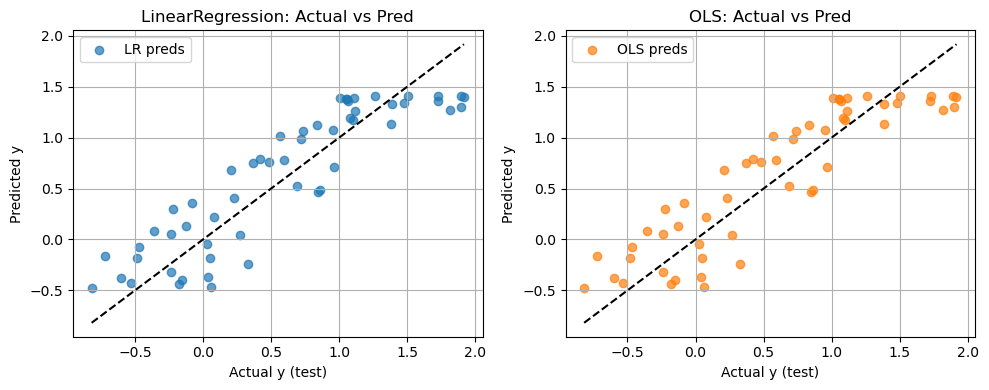

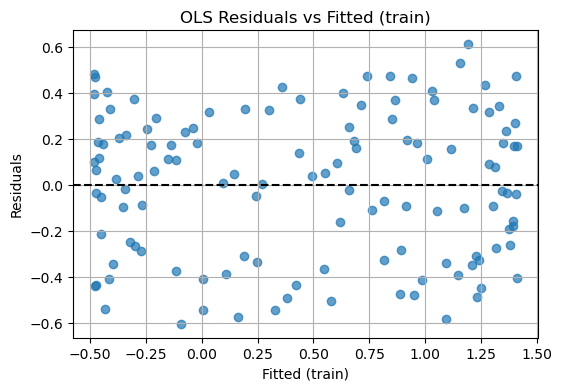

X shape:            x1        x2        x3        x4            x5
0    0.000000  0.000000  0.000000  0.000000  0.000000e+00
1    0.005556  0.000031  0.005556 -5.192957  1.714678e-07
2    0.011111  0.000123  0.011111 -4.499810  1.371742e-06
3    0.016667  0.000278  0.016666 -4.094345  4.629630e-06
4    0.022222  0.000494  0.022220 -3.806662  1.097394e-05
..        ...       ...       ...       ...           ...
176  0.977778  0.956049  0.829257 -0.022473  9.348038e-01
177  0.983333  0.966944  0.832349 -0.016807  9.508287e-01
178  0.988889  0.977901  0.835416 -0.011173  9.670357e-01
179  0.994444  0.988920  0.838456 -0.005571  9.834258e-01
180  1.000000  1.000000  0.841471  0.000000  1.000000e+00

[181 rows x 5 columns]


In [65]:



#Step 1 : load dataset
df = pd.read_csv('../data/non-linear-data-set-for-regression.csv')
df[df.isnull().any(axis=1)]  # check for missing values

# basic feature engineering (avoid invalid logs / sqrt for <=0 values)
# Step 2 : add more features as needed
df = df.copy()
df['x2'] = df['x1'] ** 2
df['x3'] = np.sin(df['x1'])
df['x4'] = np.where(df['x1'] > 0, np.log(df['x1']), 0.0)
df['x5'] = df['x1'] * df['x2']


#Step 3 : #RUn multiple linear regression on the dataset with added features

# Define X and y
X = df.drop(columns=['y'])  # or pd.concat([base_X, poly_X], axis=1).drop_duplicates(axis=1)
y = df['y'].values

#train-test split
X_train_actual,X_test_actual,y_train_actual,y_test_actual = train_test_split(X,y,test_size=0.3,random_state=1)


# Ensure X_train_actual / X_test_actual are DataFrame (create column names if needed)
if not hasattr(X_train_actual, "columns"):
    cols = X.columns.tolist() if 'X' in globals() and hasattr(X, "columns") else [f"x{i}" for i in range(X_train_actual.shape[1])]
    X_train_df = pd.DataFrame(X_train_actual, columns=cols, index=None)
    X_test_df = pd.DataFrame(X_test_actual, columns=cols, index=None)
else:
    X_train_df = X_train_actual.copy()
    X_test_df = X_test_actual.copy()

y_train = np.ravel(y_train_actual)
y_test = np.ravel(y_test_actual)

# 1) sklearn LinearRegression
lr = LinearRegression()
lr.fit(X_train_df, y_train)
y_train_pred_lr = lr.predict(X_train_df)
y_test_pred_lr = lr.predict(X_test_df)

def print_metrics(name, y_true, y_pred):
    print(f"{name}  R2: {r2_score(y_true, y_pred):.4f}  MAE: {mean_absolute_error(y_true, y_pred):.4f}  RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")

print("Sklearn LinearRegression (trained on X_train_actual):")
print_metrics("Train", y_train, y_train_pred_lr)
print_metrics("Test ", y_test, y_test_pred_lr)

# 2) Statsmodels OLS (fit on training data)
X_train_sm = sm.add_constant(X_train_df)
ols = sm.OLS(y_train, X_train_sm).fit()
print("\nStatsmodels OLS summary (train):")
print(ols.summary())

# OLS predictions on test
X_test_sm = sm.add_constant(X_test_df)
y_test_pred_ols = ols.predict(X_test_sm)
print("\nStatsmodels OLS (test metrics):")
print_metrics("Test OLS", y_test, y_test_pred_ols)

# 3) Plots: Predicted vs Actual (Test) for both models
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(y_test, y_test_pred_lr, alpha=0.7, label='LR preds', color='C0')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual y (test)"); plt.ylabel("Predicted y"); plt.title("LinearRegression: Actual vs Pred")
plt.legend(); plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(y_test, y_test_pred_ols, alpha=0.7, label='OLS preds', color='C1')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual y (test)"); plt.ylabel("Predicted y"); plt.title("OLS: Actual vs Pred")
plt.legend(); plt.grid(True)

plt.tight_layout()
plt.show()

# 4) Residuals plot for OLS (train)
resid_train = y_train - ols.fittedvalues
plt.figure(figsize=(6,4))
plt.scatter(ols.fittedvalues, resid_train, alpha=0.7)
plt.axhline(0, color='k', linestyle='--')
plt.xlabel("Fitted (train)"); plt.ylabel("Residuals"); plt.title("OLS Residuals vs Fitted (train)")
plt.grid(True); plt.show()



print("X shape:", X)




In [ ]:

#Standalone backward feature elimination

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Use a regressor (not classifier) for feature selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score

reg = RandomForestRegressor(n_estimators=100, random_state=1, n_jobs=-1)

# backward sequential feature selector (select 5 features here; change as needed)
sfs = SequentialFeatureSelector(
    reg,
    n_features_to_select=3,
    direction='backward',   # backward elimination
    scoring='r2',
    cv=5,
    n_jobs=-1
)

sfs.fit(X_train, y_train)
# selected feature names
print("Selected features  ", sfs.get_feature_names_out())
# selected feature scores
sfs.get_support()

# Evaluate model with selected features
X_train_sfs = sfs.transform(X_train)    
reg.fit(X_train_sfs, y_train)
X_test_sfs = sfs.transform(X_test)      
y_pred = reg.predict(X_test_sfs)        
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print("R2 score with selected features:", r2)

#Plot predicted vs actual
#plot regression line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.scatter(y_test, y_pred) 
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Predicted vs Actual (Test)")
plt.grid(True)
plt.show()

TypeError: SequentialFeatureSelector.__init__() got an unexpected keyword argument 'n_features_to_select'

Selected features (backward SFS): ['x1']
CV R2 (train) for selected features: mean=0.7403, std=0.0391
Test R2: 0.769300820123324
Test MAE: 0.2958399399392727
Test RMSE: 0.35838372887469533


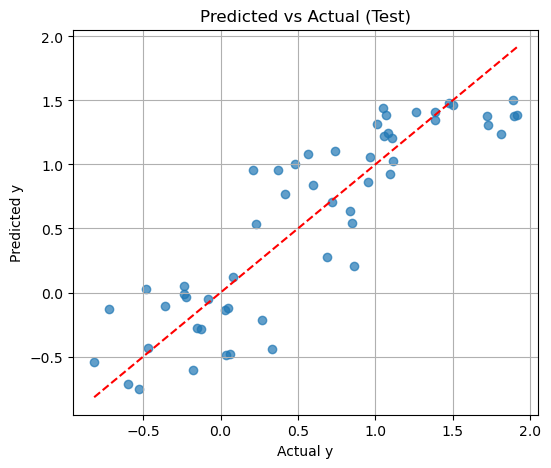

Total features: 5
Running FORWARD SFS (sklearn)...
forward  k= 1  TEST_R2=0.7689  MAE=0.2948  RMSE=0.3587  features=['x1']
forward  k= 2  TEST_R2=0.7701  MAE=0.2945  RMSE=0.3577  features=['x1', 'x5']
forward  k= 3  TEST_R2=0.7702  MAE=0.2940  RMSE=0.3576  features=['x1', 'x2', 'x5']
forward  k= 4  TEST_R2=0.7826  MAE=0.2842  RMSE=0.3479  features=['x1', 'x2', 'x4', 'x5']

Running BACKWARD SFS (sklearn)...
backward k= 1  TEST_R2=0.7689  MAE=0.2948  RMSE=0.3587  features=['x1']
backward k= 2  TEST_R2=0.7703  MAE=0.2935  RMSE=0.3576  features=['x1', 'x2']
backward k= 3  TEST_R2=0.7863  MAE=0.2798  RMSE=0.3449  features=['x1', 'x2', 'x4']
backward k= 4  TEST_R2=0.7826  MAE=0.2842  RMSE=0.3479  features=['x1', 'x2', 'x4', 'x5']

Best (forward) -> k, test_r2, features:
k                           4
test_r2              0.782568
test_mae             0.284235
test_rmse            0.347926
features     [x1, x2, x4, x5]
Name: 3, dtype: object

Best (backward) -> k, test_r2, features:
k         

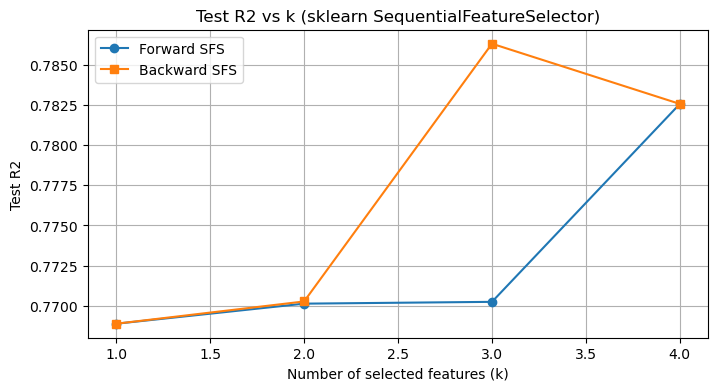

In [72]:
# Replace SFS cells with sklearn-only forward/backward comparison (uses RandomForestRegressor)
from tabnanny import verbose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# prepare X,y (assumes df already loaded and contains 'y')
X = df.drop(columns=['y'])
y = df['y'].values

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

reg = RandomForestRegressor(n_estimators=200, random_state=1, n_jobs=-1)
n_features = X_train.shape[1]
print(f"Total features: {n_features}")
max_k = n_features -1

def evaluate_sfs(direction):
    results = []
    for k in range(1, max_k + 1):
        sfs = SequentialFeatureSelector(reg, n_features_to_select=k, direction=direction, scoring='r2', cv=5, n_jobs=-1)
        sfs.fit(X_train, y_train)
        mask = sfs.get_support()
        sel_feats = X_train.columns[mask].tolist()
        # fit on train selected features and evaluate on test
        reg.fit(X_train[sel_feats], y_train)
        y_pred = reg.predict(X_test[sel_feats])
        test_r2 = r2_score(y_test, y_pred)
        test_mae = mean_absolute_error(y_test, y_pred)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        results.append({'k': k, 'features': sel_feats, 'test_r2': test_r2, 'test_mae': test_mae, 'test_rmse': test_rmse})
        print(f"{direction:8s} k={k:2d}  TEST_R2={test_r2:.4f}  MAE={test_mae:.4f}  RMSE={test_rmse:.4f}  features={sel_feats}")
    return pd.DataFrame(results)

print("Running FORWARD SFS (sklearn)...")
df_fwd = evaluate_sfs('forward')
print("\nRunning BACKWARD SFS (sklearn)...")
df_bwd = evaluate_sfs('backward')

# pick best k by test R2
best_fwd = df_fwd.loc[df_fwd['test_r2'].idxmax()]
best_bwd = df_bwd.loc[df_bwd['test_r2'].idxmax()]

print("\nBest (forward) -> k, test_r2, features:")
print(best_fwd[['k','test_r2','test_mae','test_rmse','features']])
print("\nBest (backward) -> k, test_r2, features:")
print(best_bwd[['k','test_r2','test_mae','test_rmse','features']])

# plot comparison
plt.figure(figsize=(8,4))
plt.plot(df_fwd['k'], df_fwd['test_r2'], marker='o', label='Forward SFS')
plt.plot(df_bwd['k'], df_bwd['test_r2'], marker='s', label='Backward SFS')
plt.xlabel('Number of selected features (k)')
plt.ylabel('Test R2')
plt.title('Test R2 vs k (sklearn SequentialFeatureSelector)')
plt.legend()
plt.grid(True)
plt.show()